In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
X = plt.imread('./image1.jpg')
X.shape

(200, 300, 3)

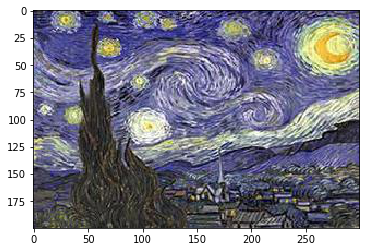

In [3]:
plt.imshow(X)

In [4]:
h, w, c = X.shape
X = X.reshape((-1, c))
X.shape

(60000, 3)

In [5]:
class GaussianMixtureModel:
    
    def __init__(self):
        pass
    
    def fit(self, X, k, n_iter = 100):
        assert len(X.shape) == 2
        n, d = X.shape
        self.n = n
        self.d = d
        # random non-uniform init for posteriors
        self.w = np.random.randint(low = 1, high = 10, size = (n, k)).astype('float64')
        self.w = self.w / np.sum(self.w, axis = 1)[:, None]
        # priors
        self.p = np.mean(self.w, axis = 0)
        # ML estimate of the means and covariances based on the init posteriors
        self.m = np.matmul(self.w.T, X) / np.matmul(self.w.T, np.ones((n, 1)))
        self.S = np.zeros((k, d, d))
        for i in range(k):
            self.S[i] = (1/np.sum(self.w[:, i])) * np.matmul((self.w[:, i, None]*(X - self.m[i])).T, (X - self.m[i]))
        
        self.LL = np.zeros((n_iter, ))
        # Iterations of EM algorithm
        for e in range(n_iter):
            # update posteriors to get the lower bound of likelihood - E step
            log_likelihood = 0
            for i in range(n):
                px = np.zeros((k))
                for j in range(k):
                    px[j] = self.p[j] * st.multivariate_normal.pdf(X[i], self.m[j], self.S[j])
                self.w[i] = px / np.sum(px)
                log_likelihood += np.sum(self.w[i] * np.log(px / self.w[i]))
            self.LL[e] = log_likelihood
            print('iter = {}, log likelihood = {} '.format(e + 1, log_likelihood))
            # Maximize lower bound of likelihood - M step   
            self.p = np.mean(self.w, axis = 0)
            self.m = np.matmul(self.w.T, X) / np.matmul(self.w.T, np.ones((n, 1)))
            self.S = np.zeros((k, d, d))
            for j in range(k):
                self.S[j] = (1/np.sum(self.w[:, j])) * np.matmul((self.w[:, j, None]*(X - self.m[j])).T, (X - self.m[j]))
    
    def predict(self):
        X_ml = np.zeros((self.n, self.d))
        for i in range(self.n):
            idx = np.argmax(gmm.w[i])
            X_ml[i] = gmm.m[idx]
        return X_ml        

In [6]:
gmm = GaussianMixtureModel()
gmm.fit(X, 10, n_iter = 30)

iter = 1, log likelihood = -814110.3721939888 
iter = 2, log likelihood = -812070.8378731092 
iter = 3, log likelihood = -799910.2273092095 
iter = 4, log likelihood = -794337.1520466689 
iter = 5, log likelihood = -790992.9804775693 
iter = 6, log likelihood = -788551.2097233115 
iter = 7, log likelihood = -786553.7136262598 
iter = 8, log likelihood = -785009.157347622 
iter = 9, log likelihood = -783823.0409923604 
iter = 10, log likelihood = -782891.8539876327 
iter = 11, log likelihood = -782170.4420290983 
iter = 12, log likelihood = -781604.7421106085 
iter = 13, log likelihood = -781112.0410157144 
iter = 14, log likelihood = -780638.4454864388 
iter = 15, log likelihood = -780169.1147968756 
iter = 16, log likelihood = -779700.2005415595 
iter = 17, log likelihood = -779229.6441305727 
iter = 18, log likelihood = -778760.6365705277 
iter = 19, log likelihood = -778294.1063985085 
iter = 20, log likelihood = -777823.0018193057 
iter = 21, log likelihood = -777334.8112348443 
it

Text(0,0.5,'log likelihood')

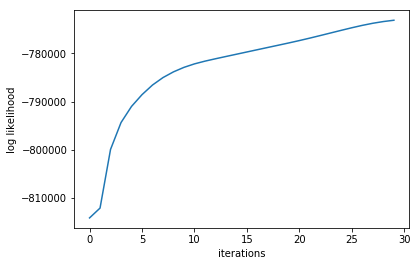

In [7]:
plt.figure()
plt.plot(gmm.LL)
plt.xlabel('iterations')
plt.ylabel('log likelihood')

In [8]:
gmm.m

array([[ 77.08610682,  76.57793116, 109.88371937],
       [216.33183323, 205.13174493, 112.60385782],
       [ 63.12348911,  62.42072151,  92.27636067],
       [ 56.30505794,  54.92456611,  51.8865469 ],
       [ 60.34107022,  59.53559339,  83.08464906],
       [146.29457262, 148.85082639, 170.44267814],
       [ 99.69173064,  99.6911299 , 132.68057668],
       [112.29579713, 111.09584026, 155.32771705],
       [157.84792175, 163.30618316, 149.92153521],
       [ 77.11932377,  77.33819263, 103.54343865]])

In [9]:
gmm.S

array([[[ 865.73541591,  872.26896415,  790.98445693],
        [ 872.26896415,  901.63715195,  777.33745152],
        [ 790.98445693,  777.33745152, 1239.01130677]],

       [[ 775.97597985,  556.88981526,  237.64064098],
        [ 556.88981526,  818.68026295,  928.79050976],
        [ 237.64064098,  928.79050976, 1674.53828033]],

       [[ 644.44966849,  640.6453066 ,  737.46953101],
        [ 640.6453066 ,  645.74640115,  738.82810874],
        [ 737.46953101,  738.82810874, 1403.78822233]],

       [[ 432.37026153,  419.33403943,  385.51001023],
        [ 419.33403943,  425.87468524,  400.50109307],
        [ 385.51001023,  400.50109307,  425.21206585]],

       [[ 482.20289215,  478.63244566,  599.81054001],
        [ 478.63244566,  481.4177615 ,  603.5110483 ],
        [ 599.81054001,  603.5110483 , 1222.94728942]],

       [[2545.13030044, 2549.68318175, 1834.44164376],
        [2549.68318175, 2585.38133284, 1796.21428079],
        [1834.44164376, 1796.21428079, 1587.11107814]],

In [10]:
gmm.w

array([[2.97069911e-01, 1.75261237e-18, 2.73910912e-02, ...,
        1.04991261e-06, 1.57247730e-02, 6.57486073e-01],
       [3.02666758e-01, 3.25282444e-16, 7.43907333e-02, ...,
        5.18447796e-06, 2.21536576e-02, 5.80538495e-01],
       [2.63847925e-01, 5.66826454e-15, 1.41210801e-01, ...,
        2.03362165e-06, 2.16103203e-02, 4.86882262e-01],
       ...,
       [2.72700387e-03, 1.26141865e-05, 2.45478775e-05, ...,
        9.48798597e-05, 8.87758491e-01, 8.74712856e-03],
       [1.69999618e-03, 1.32857392e-05, 9.95188636e-06, ...,
        1.21394410e-04, 9.00789636e-01, 5.91380290e-03],
       [5.54069489e-03, 4.87534976e-06, 1.11445169e-04, ...,
        5.39261735e-06, 9.19584992e-01, 2.48230307e-02]])

In [13]:
X_ml = gmm.predict()
X_ml = X_ml.reshape((h, w, -1))

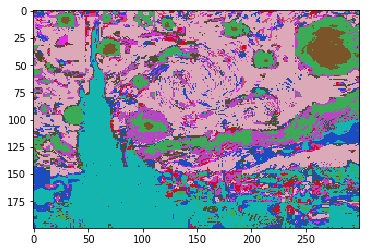

In [14]:
plt.imshow(X_ml)